# Sieci neuronowe

# Przypomnienie:
* zbiór uczący dla uczenia bez nauczyciela
* algorytm k_means
* algorytm EM
* Reguła Hebba

# Sieci liniowe
Sieci neuronowe możemy sobie wyobrażać w postaci grafów skierowanych.
Ich krawędzie odpowiadają połączeniom między jednostkami i wykonują operację mnożenia przez wagę, zaś w ich wierzchołkach znajdują się jednostki wykonujące pewne działania, np. sumowanie wejść i zastosowanie do tej sumy jakiejś funkcji $f$. Koncepcję tą ilustruje poniższy rysunek:
![](http://brain.fuw.edu.pl/edu/images/1/1b/Slajd1.jpg)
**Sieć złożona z jednego neuronu jako graf. Wejścia do jednostki stanowią warstwę wierzchołków wejściowych, jej wagi są własnością krawędzi.**

![](http://brain.fuw.edu.pl/edu/images/6/65/Slajd2.jpg) 
**Sieć złożona z dwóch jednostek. Wartości z wierzchołków wejściowych przekazywane są przez krawędzie do wierzchołków położonych w kolejnej warstwie. **

Pierwszą siecią, którą będziemy omawiać jest sieć złożona z jednostek liniowych. Oznacza to, że funkcja $f$ występująca w dotychczasowych schematach to funkcja liniowa.

## Co może robić sieć liniowa?
### Odwzorowania liniowe 
Wyjście z neuronu można zapisać jako:

$\qquad  $ $ y = \sum_{i=0}^n w_i x_i$

> Rozpoznajemy tu znane z pierwszego wykładu równanie regresji liniowej!

## Warstwa liniowa
* A zatem najprostsza sieć liniowa formalnie realizuje regresję liniową. 
* Zobaczmy co realizuje sieć złożona z wielu elementów liniowych.
* Wagi związane z jednostką 'm-tą' są grupowane w wektory wag.

![](http://brain.fuw.edu.pl/edu/images/c/c8/Warsta_k_neuronow_liniowych.png) 
**Sieć złożona z $k$ jednostek liniowych. Wartości z $n$ wierzchołków wejściowych przekazywane są przez krawędzie do wierzchołków położonych w kolejnej warstwie.**  

Zapiszmy wartości podawane na wierzchołki wejściowe jako wektor kolumnowy:

$\qquad  $ $\mathbf{x} = \left[
\begin{array}{c}
x_1\\
x_2\\
\vdots\\
x_n\\
\end{array}
\right]$ 

Jest on wspólny dla wszystkich jednostek.

Wektor wag związanych z 'm-tą' jednostką zapiszmy jako wektor wierszowy:
$\qquad  $ $ \mathbf{w}^{(m)} = (w_1^{(m)}, w_2^{(m)}, \dots,w_n^{(m)})$
z wektorów tych możemy zbudować macierz $ k \times n $:
$\qquad  $ $
W = \left[
\begin{array}{cccc}
w_1^{(1)} & w_2^{(1)} &\dots & w_n^{(1)}\\
w_1^{(2)} & w_2^{(2)} &\dots & w_n^{(2)}\\
\vdots & \vdots & \vdots & \vdots \\
w_1^{(k)} & w_2^{(k)} &\dots & w_n^{(k)}
\end{array}
\right]
$

Jeśli teraz zapiszemy wektor wyjściowy jako wektor kolumnowy: 

$\mathbf{y} = (y^{(1)}, y^{(2)}, \dots y^{(k)})^T$

$\qquad  $ $\mathbf{y} = \left[
\begin{array}{c}
y^{(1)}\\
y^{(2)}\\
\vdots\\
y^{(k)}
\end{array}
\right]$ 

To widać, że:
$\qquad  $ $ \mathbf{y} = W X$

> Oznacza to, że warstwa liniowa dokonuje pewnego przekształcenia linowego 

>$X \rightarrow Y$ z przestrzeni $\mathcal{R}^n$ do przestrzeni $\mathcal{R}^k$ 

>zadanego przez macierz $W$. 

Jednym z powszechnych zastosowań jest konstrukcja automatycznie adaptujących się filtrów liniowych.

## Obliczenia służące klasyfikacji 
Inną możliwością zastosowania sieci liniowej jest możliwość "rozpoznawania" pewnych wzorców wejściowych. Jak to się dzieje?

W tym zastosowaniu musimy zapewnić sobie, że zarówno wektor wejściowy jak i wektor wag są unormowane:

$\qquad  $ $ ||\mathbf{x}||=1$

oraz

$\qquad  $  $ ||\mathbf{w}^{(m)}||=1$

W tej sytuacji wyjście 'm-tej' jednostki jest:

$\qquad  $ $y^{(m)} = \mathbf{w}^{(m)}\mathbf{x}  = \cos \phi$

gdzie $\phi$ jest kątem między wektorami $\mathbf{w}^{(m)}$ i $\mathbf{x}$. 

Czyli czym mniejszy kąt między tymi wektorami, tzn. są one do siebie bardziej podobne, tym większy sygnał wyjściowy z neuronu. W tym sensie możemy powiedzieć, że
neuron "rozpoznaje" wzorce podobne do zapamiętanych w wagach.

# Uczenie sieci liniowej 

> Celem uczenia sieci jest taka modyfikacja jej wag aby błąd popełniany przez sieć dla przykładów ciągu uczącego $\left\{X^{(j)},z^{(j)} \right\}_{j=1,\dots,m}$ był możliwie mały. 

Przypadek sieci zbudowanej z pojedynczego elementu jest dokładnym odpowiednikiem regresji liniowej. Podobnie jak dla regresji liniowej możemy i tu wprowadzić pojęcie funkcji kosztu zdefiniowanej jako:

$\qquad  $  $J(w) = \frac{1}{2} \sum_{j =1}^m \left(y^{(j)} - z^{(j)}  \right)^2$

tu wartość pożądana dla przykładu $j$ wynosi $z^{(j)}$ zaś $y^{(j)} $ oznacza faktyczna odpowiedź sieci dla tego przykładu.

Analogicznie jak w przypadku regresji liniowej możemy zastosować algorytm spadku gradientowego w wersji stochastycznej lub zbiorczej.

W aktualnej notacji wersja zbiorcza algorytmu wygląd tak (dla $j$-tej wagi):

$\qquad  $ $w_{j} := w_j - \alpha \frac{\partial }{\partial w_j } J(w ) = w_j - \alpha \sum _{i=1}^{m} \left( y^{(i)} - z^{(i)} \right) x_j^{(i)} $

zaś w przypadku metody spadku stochastycznego należy wylosować przykład $i$-ty z ciągu uczącego i zmodyfikować wagi tak:

$\qquad  $ $w_{j} :=  w_j - \alpha \left( y^{(i)} - z^{(i)} \right) x_j^{(i)} $

## Przykład funkcji kosztu
Rozważmy funkcję kosztu dla neuronu o dwóch wejściach i jednym wyjściu. 

Realizuje on odwzorowanie liniowe $ y = w x + b$. 

Niech ciąg uczący będzie {(1,2), (1.5, 3)}. 

Możemy obliczyć błąd jaki popełnia nasz neuron dla wielu wartości 'w' i dla wielu wartości 'b'.   

Wykreślając tą wartość we współrzędnych (w,b) otrzymujemy powierzchnię funkcji błędu jak na rys. obok (dla lepszego uwidocznienia kształtu powierzchnia ta został ucięta na poziomie koszt =1).
![](http://brain.fuw.edu.pl/edu/images/a/ad/Pow_bladu_3d.png)
**Powierzchnia błędu z naszego przykładu.**  

### Uwagi


Jak wpływa dobór ciągu uczącego na to, czego sieć się nauczyła?
* Funkcja kosztu dla sieci liniowej ma jedno minimum i jest to minimum globalne. 
* Jeśli ciąg uczący rozpina przestrzeń możliwych wejść, to sieć dąży do globalnego minimum.
* Jeśli w przestrzeni możliwych wejść istnieje podprzestrzeń ortogonalna do podprzestrzeni wzorców w ciągu uczącym, to sieć dąży do minimum parabolicznej rynny.

<img src="http://brain.fuw.edu.pl/edu/images/e/eb/Pow_bledu_rynna.png" width="800">

**Powierzchnia błędu w przypadku gdy wzorce nie rozpinają całej przestrzeni wejść.**

## Rozszerzenie metody spadku gradientowego na sieć złożoną z wielu jednostek

Algorytm spadku gradientowego przenosi się w naturalny sposób na sieć elementów liniowych w postaci warstwy:
* w ciągu uczącym $ \left\{ \left( X^{(j)},Z^{(j)} \right)\right\}_{j=1,\dots,m} $
zamiast wartości $z$ podajemy wektor wartości pożądanych $Z$


* zamiast modyfikować wektor wag, modyfikujemy macierz wag $W$:

$\qquad  $ $W^{(j+1)} := W^{(j)} - \alpha \left( Y^{(j)}- Z^{(j)} \right) \left(X^{(j)}\right) ^T$

Sieci liniowe MADALINE (Many Adaptive Linear Elements) z tym algorytmem uczenia wykorzystywane były jako filtry adaptacyjne np.:
* do tłumienia “echa” w liniach telefonicznych 
* do poprawiania stosunku sygnału do szumu, czyli do filtrowania

## Przyspieszanie uczenia 
* Kontrolowanie wartości parametru $ \alpha$. 
  * Uczenie rozpoczynamy od stosunkowo dużych wartości. Następnie stopniwo zmniejszamy jego wartość.  
  

* Dodanie składnika bezwładności:

$\qquad  $ $ W(k+1) = W(k)  - \alpha_1 \left(Y(k) - Z(k)\right)\left( X(k)\right)^T + \alpha_2 M(k)$

gdzie: k - krok uczenia,  zaś $ M(k) =W(k) - W(k-1)$ jest poprzednią zmianą wagi.

$\qquad  $ $ \Delta W =  - \alpha_1 \left(Y(k) - Z(k)\right)\left( X(k)\right)^T + \alpha_2 M(k)$

* Dla prawie płaskiej powierzchni kosztu mamy:
$\qquad   \Delta W = W(k+1)-W(k) \approx M(k)$
* Podstawiając do poprzedniego równania mamy
$\qquad  $ $ \Delta W \approx  - \alpha_1 \left(Y(k) - Z(k)\right)\left( X(k)\right)^T + \alpha_2 \Delta W$
* Po przekształceniu dostajemy:
$\qquad  $ $\Delta W \approx - \frac{\alpha_1}{1-\alpha_2} \left(Y(k) - Z(k)\right)\left( X(k)\right)^T $

> Oznacza to, że dla prawie płaskiej powierzchni błędu otrzymujemy efektywny współczynnik uczenia $ \frac{1}{1-\alpha_2}$ większy niż w przypadku algorytmu bez bezwładności. 

* Dla typowych wartości $\alpha_1 = 0.1$ i $\alpha_2 = 0.9$ otrzymujemy około 10 krotne przyspieszenie!

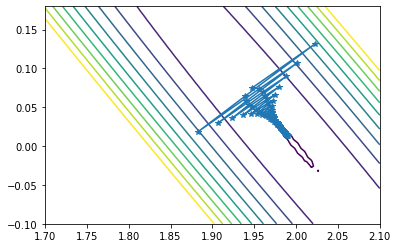

In [1]:
# -*- coding: utf-8 -*-
# %matplotlib notebook
# import matplotlib
#matplotlib.use('TkAgg')
import numpy as np

from matplotlib.pyplot import  plot, show, ion, ioff, figure, contour, draw,pause,clf
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as animation
import numpy as np

def koszt(w,b,X,Y):
    z = np.zeros((len(w),len(b)))
    for i,to_w in enumerate( w):
        for j,to_b in enumerate( b):
            for ind in range(len(Y)):         
                z[j,i] += ( (to_w*X[ind] + to_b) - Y[ind])**2
    return z

class siec(object):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.N_wej = X.shape[1] 
        self.N_wyj = Y.shape[1] 
        self.w_1 = np.array([[0],[1.85]]).T   
        self.dw1 = np.zeros((self.N_wyj, self.N_wej+1))
        
    def get_params(self):
        return self.w_1.reshape(-1)
 
    def fit_one_step(self, eta1,eta2):
        self.bl = 0
        D_1 = np.zeros((self.N_wyj, self.N_wej+1))
        for i in range(0,self.X.shape[0]):
            x = self.X[i,:].reshape(self.N_wej,1)
            y = self.Y[i,:].reshape(self.N_wyj,1)
            a_0 = np.vstack((1,x))  # z warstwy wejściowej (zerowej) wychodzi a_0
            z = np.dot( self.w_1, a_0 )
            # obliczam błąd
            d_1 = (z - y) 
            # obliczam deltę
            D_1 +=   d_1*a_0.T           
        # uaktualniamy wagi     
        self.w_1 -=  eta1*D_1 + eta2*self.dw1
        self.dw1  =  eta1*D_1 
        
# tworzymy ciąg uczący 
X = np.array([[1],[1.5]])
Y = np.array([[2],[3]])

# wytwarzamy obiekt sieć
ta_siec = siec(X,Y)
eta1 = 0.2   
eta2 = 0.8

# zakres wag do sprawdzenia
w = np.linspace( 1.7, 2.1, 50)
b = np.linspace(-0.1, 0.18, 50)

# obliczmy wartości pow. błędu.
z = koszt(w,b,X,Y)


N_epochs = 100
data = np.zeros((2,N_epochs))
figure()
for cykl in range(N_epochs):
    ta_siec.fit_one_step(eta1,eta2) # wykonaj krok uczenia
    data[:,cykl] = ta_siec.get_params()
    clf()
    contour(w,b,z,np.linspace(0.0001,0.1,10))
    plot(data[1,0:cykl], data[0,0:cykl],'*-')
show()

## Ograniczenia sieci elementów liniowych
* sieć może jedynie realizować liniowe odwzorowania $X \rightarrow  Y$
* w odróżnieniu od sieci nieliniowych, liniowe sieci wielowarstwowe nie wnoszą jakościowo nic w stosunku do sieci jednowarstwowych, bo złożenie operacji liniowych da nam i tak operację liniową

# Nieliniowość
Nowością wprowadzoną przez Perceptron(Rosenblatt 1958) w stosunku do sieci MADALINE, było zastosowanie elementu nieliniowego. W perceptronie wyjście neuronu:

$\qquad  $ $ y = f(e)$

![](http://brain.fuw.edu.pl/edu/images/0/03/Sztuczny_neuron.png) \
**Model neuronu z nieliniowością**
gdzie pobudzenie  \
$\qquad  $ $ e = \sum_{i=1}^n  w_ix_i + w_0 = \sum_{i=0}^n w_ix_i \quad \Leftarrow x_0 := 1 $

Demo z tensorflow playground [https://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=1&seed=0.23806&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false]

# Formy nieliniowości
Okazuje się, że w wielu przypadkach dobrze sprawdzają się następujące dwie funkcje sigmoidalne:
## funkcja logistyczna:

$\qquad   y = \frac{1}{1+\exp(-\beta a)} $
  * pochodna: $\frac{dy}{da} = \beta y (1-y)$
  * zbiór wartości otwarty: $y \in (0,1)$

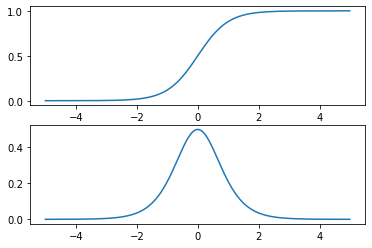

In [2]:
# %matplotlib ipympl
import numpy as np
import matplotlib.pylab as plt

beta = 2
a = np.arange(-5,5,0.01)
y = 1/(1+np.exp(-beta*a))
plt.figure()
plt.subplot(2,1,1)
plt.plot(a,y)
plt.subplot(2,1,2)
plt.plot(a, beta*y*(1-y))
plt.show()


## tangens hiperboliczny

$\qquad   y = \tanh(\beta a) = \frac{\exp(\beta a)-\exp(-\beta a)}{\exp(\beta a) + \exp(-\beta a)} $

  * pochodna $\frac{d y }{d a} = \beta(1+y)(1-y) $
  * zbiór wartości $y \in (-1,1)$
  
We wszystkich powyższych wzorach $\beta$ to parametr odpowiadający za stromość sigmoidy, zaś $a$ to aktywacja neuronu.

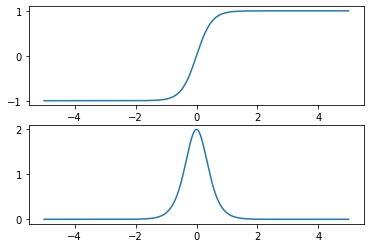

In [3]:
beta = 2
a = np.arange(-5,5,0.01)
y = np.tanh(beta*a)
plt.figure()
plt.subplot(2,1,1)
plt.plot(a,y)
plt.subplot(2,1,2)
plt.plot(a, beta*(1+y)*(1-y))
plt.show()

## funkcja prostownicza: ReLu

$\qquad  $ $y = \max(0, a)$ gdzie $ a = W x +b$

  * podstawową zaletą tej funkcji jest to, że ma stały niezerowy gradient (w zakresnie $a>0$) więc nie da się jej wysycić

  * rzadka reprezentacja (dla $a\le0$)

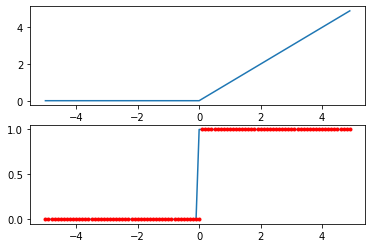

In [4]:
a = np.arange(-5,5,0.1)
y = np.maximum(0,a) 
plt.figure()
plt.subplot(2,1,1)
plt.plot(a,y)
plt.subplot(2,1,2)
plt.plot(a[0:-1], np.diff(y)/0.1)

plt.plot(a,np.sign(y),'r.')
plt.show()

# Uczenie reułą delta
## Pojedynczy neuron: reguła delta
Podobnie jak dla wszystkich omawianych dotychczas sieci celem uczenia neuronu nieliniowego jest taki dobór jego wag, aby zminimalizować błąd średnio-kwadratowy popełniany na ciągu uczącym. 
Niech ciąg uczący będzie:

$\qquad  \left\{ \left(X^{(j)}, z^{(j)}\right)\right\}_{j = 1,\dots,N} $

Funkcja błędu to:

$\qquad  $ $J(w) = \frac{1}{2} \sum_{j=1}^N\left(z^{(j)}- y^{(j)} \right)^2 = \sum_{j=1}^N J^{(j)}(w)$

gdzie:

$\qquad  y^{(j)} = f\left(a^{(j)}\right) = f \left( \sum_{i=0}^n w_i x_i^{(j)}\right)$, $\qquad  $ $a$ - to aktywacja

zaś

$\qquad  J^{(j)}(w) = \frac{1}{2} \left( z^{(j)} -y^{(j)}\right)^2 $

podobnie jak w przypadku regresji liniowej chcemy zmieniać wagi w kierunku przeciwnym do kierunku gradientu funkcji kosztu, 

tzn. po prezentacji $j$ przykładu $i$-ta waga zmienia się tak:

$\qquad w_i^{(j+1)} - w_i^{(j)} = \Delta w_i^{(j)} = -\eta \frac{\partial J^{(j)} }{\partial w_i} = 
-\eta \frac{\partial J^{(j)} }{\partial y} 
\frac{\partial y^{(j)}}{\partial w_i} = $
$- \eta \frac{\partial J^{(j)} }{\partial y} \frac{\partial y^{(j)}}{\partial a} \frac{\partial a^{(j)}}{\partial w_i} $


łatwo zauważyć, że:

$\qquad  $ $\frac{\partial J^{(j)} }{\partial y} = - \left( z^{(j)} -y^{(j)}\right) $

oraz, że:

$\qquad  $ $ \frac{\partial a^{(j)}}{\partial w_i} = x_i^{(j)}$

natomiast:

$\qquad  $ $\frac{\partial y^{(j)}}{\partial a} = \frac{d f(a^{(j)})}{da} $

Łącząc te wszystkie spostrzeżenia otrzymujemy:

$\qquad  $ $ \Delta w_i^{(j)} = \eta \frac{df(a)}{d a}\left(z^{(j)} - y^{(j)}\right)x_i^{(j)} = \eta \delta^{(j)}x_i^{(j)}$

gdzie wprowadziliśmy:

$\qquad  $ $\delta^{(j)} = \frac{df(a)}{da} \left( z^{(j)}- y^{(j)}\right)$

## Uczenie nieliniowej sieci: Jak znaleźć błąd dla warstwy ukrytej?
### Pomysł: 
* błąd $\delta_m^{(j)}$ występujący w ''j'' − tym kroku uczenia na neuronie ''m'' rzutujemy wstecz do wszystkich neuronów, które stanowią wejście dla neuronu ''m'' − tego.
* Rzutując, mnożymy błąd przez ten sam współczynnik wagowy, który w czasie propagacji ''w przód'' ważył wejście.
* **Dlaczego?**
_Uzasadnienie intuicyjne:_ Jeśli neuron warstwy ukrytej przyczynił się do powstania błędu na neuronie warstwy wyjściowej rzutując ''w przód'' przez dużą wagę, to trzeba mu zwrócić informację o błędzie proporcjonalnie do tej wagi.

<img align="left" src="http://brain.fuw.edu.pl/edu/images/7/71/Rzutowanie.png" width=800>

### Uzasadnienie formalne: 

Reguła ta wynika wprost z gradientowej metody minimalizacji funkcji błędu.
Rozważmy sieć dwuwarstwową.
<img align="left" src="http://brain.fuw.edu.pl/edu/images/b/bf/Backprop_oznaczenia.png" width=800>


Dla wzorca $j$ − tego $k$ − ta jednostka ukryta otrzymuje pobudzenie:

$\qquad  $ $a_k^{(j)} = \sum_{i \in U}w_i^{k{(j)}}x_i^{(j)}$

gdzie: $ U $ - indeksy wejść warstwy ukrytej, $w_i^{k{(j)}}$ - $i$-ta waga $k$-tej jednostki w $j$-tym kroku uczenia.

Jednostka ta wytwarza sygnał wyjściowy:

$\qquad  $ $V_k^{(j)} = f\left( a_k ^{(j)}\right) = f\left(\sum_{i \in U} w_i^{k(j)} x_i^{(j)}\right) $

Jednostka wyjściowa, $n$ − ta, otrzymuje zatem sygnał:

$\qquad   a_n^{(j)} = \sum_{i \in Wyj} W_i^{n(j)}V_i^{(j)} = \sum_{i \in Wyj} 
W_i^{n(j)}f\left(\sum_{i \in U} w_i^{k(j)}x_i^{(j)}\right)
$

$\qquad  $(gdzie: $Wyj$ — indeksy wejść warstwy wyjściowej, uwaga: $a_n^{(j)} \ne a_k^{(j)}$ dla $ n \ne k $ !)

i wytwarza sygnał wyjściowy: 

$\qquad  y_n^{(j)} = f\left(a_n^{(j)}\right) = f\left(\sum_{i \in Wyj} W_i^{n(j)} f\left(\sum_{i \in U} w_i^{k(j)}x_i^{(j)}\right)\right)
$

Miara błędu wygląda tak:

$\qquad  J(\mathbf{w}) = \frac{1}{2}\sum_{n,j}\left(z_n^{(j)} - y_n{(j)}\right)^2 
= \frac{1}{2}\sum_{n,j} \left(z_n^{(j)} - f\left( \sum_{i \in Wyj} W_i^{n(j)}f\left(\sum_{i \in U}w_i^{k(j)}x_i^{(j)}\right)\right) \right)^2
$

i jest _ciągłą i różniczkowalną funkcją wszystkich wag_ , możemy więc ją minimalizować zmieniając wagi w kierunku przeciwnym do gradientu ($\mathbf{w}$ to wszystkie wagi zarówno $w$ jak i $W$ ).

Dla warstwy wyjściowej otrzymujemy:

$\qquad   \Delta W_i^{n(j)} = -\eta \frac{\partial J^{(j)}}{\partial W_i^{n}} = \eta \left( z_n^{(j)} - y_n^{(j)}\right) \frac{df(a_n^{(j)})}{da} V_k^{(j)} = \eta \delta^{(j)} V_k^{(j)} $

gdzie oznaczyliśmy: $\delta_n^{(j)} = \left( z_n^{(j)} - y_n^{(j)}\right) \frac{df(a_n^{(j)})}{da}$

Dla warstwy ukrytej otrzymujemy: 
<img align="left" src="http://brain.fuw.edu.pl/edu/images/6/6f/Backprop_2.png" width=800>

$\qquad  \Delta w_i^{k(j)} = -\eta \frac{\partial J^{(j)}}{\partial w_i^k} = -\eta \frac{\partial J^{(j)}}{\partial V_k }\frac{\partial V_k^{(j)}}{\partial w_i^k} =$

$\qquad   = \eta \sum_n \left(z_n^{(j)} - y_n^{(j)}\right)
\frac{df(a_n^{(j)})}{d a_n}W_i^n \frac{df(a_k^{(j)})}{da_k}  x_i^{(j)} =$

$\qquad  =\eta \sum_n \delta_n^{(j)}W_i^n \frac{df(a_k^{(j)})}{da_k}x_i^{(j)} =$

$\qquad   =\eta \frac{df(a_k^{(j)}) }{d a_k} \sum_n W_i^n \delta_n^{(j)} =$

$\qquad   =\eta \delta_k^{(j)} x_i^{(j)} $

przy czym zdefiniowaliśmy: 

$\qquad  \delta_k^{(j)} = \frac{df(a_k^{(j)}) }{d a_k} \sum_n W_i^n \delta_n^{(j)}$

Widać, że wzór na zmianę wag, czy to warstwy wejściowej, czy ukrytej ma tę samą postać, różni się jedynie definicją $ \delta$. Dla warstw ukrytych błąd jest sumą ważoną (wagami połączeń "do przodu") błędów popełnionych w wyższej warstwie.

Regułę tą można udowodnić dla dowolnej ilości warstw stosując odpowiednią ilość razy regułę łańcuchową.

# Implementacja
Przyjrzyjmy się teraz prostej implementacji tego pomysłu:

In [5]:
import numpy as np 

## Zbiór uczący:
* wejście, 

In [6]:
X = np.array([  [0,0],
                [0,1],
                [1,0],
                [1,1]])

* wyjście  

In [7]:
 Y = np.array([[0,1], 
              [1,0], 
              [1,0],
              [0,1]])

Do rozmiarów wejścia i wyjścia musimy dopasować rozmiary zewnętrznych warstw sieci:    

In [8]:
N_wej = X.shape[1] # rozmiar wejscia
N_hid = 3   # jednostki ukryte
N_wyj = Y.shape[1]  # rozmiar wyjscia

* inicjujemy połączenia
  * wagi ułożone są tak, że w kolejnych wierszach są kolejne neurony 
  * a w kolumnach wagi od konkretnego neuronu 
  * to +1 jest wagą dla obciążenia
  

In [10]:
w_1 = 2*np.random.random((N_hid, N_wej+1)) - 1# pomiędzy warstwą pierwszą (wejściem) a warstwą ukrytą
w_2 = 2*np.random.random((N_wyj, N_hid+1)) - 1                                   

Zdefiniujmy jeszcze nieliniowowść występującą w neuronach:

In [12]:
def g(x):
    y = 1./(1+np.exp(-x))   # sigmoida
    
    return y

i jej pochodną :

In [13]:
def g_prim(x):  
    y = x*(1-x)
    
    return y    

Wytworzyliśmy następującą strukturę:

<img align="left" src="https://brain.fuw.edu.pl/edu/images/7/75/Back_prop_forward-2.png" style="width: 1024px;"/> 

In [14]:
w_1 = 2*np.random.random((N_hid, N_wej+1)) - 1 # pomiędzy warstwą pierwszą (wejściem) a warstwą ukrytą
w_2 = 2*np.random.random((N_wyj, N_hid+1)) - 1 

Ncykli = 10000
for cykl in range(Ncykli):
    bl =0
    D_1 = np.zeros((N_hid,N_wej+1))
    D_2 = np.zeros((N_wyj,N_hid+1))    
    for i in range(0,4):     # weźmy przykład i-ty        
        x = X[i,:].reshape(X.shape[1],1)
        y = Y[i,:].reshape(Y.shape[1],1)       
        # propagacja "w przód"
        a_0 = np.vstack((1,x))  # z warstwy wejściowej (zerowej) wychodzi a_0
        
        z_1 = np.dot( w_1, a_0 )# na warstwe 1 wchodzą iloczyny skalarne 
        a_1 = np.vstack((1, g(z_1))) # dokładamy 1 i dostaję wyjście z warstwy 1
        
        z_2 = np.dot( w_2, a_1 ) # na warstwe 3 wchodzą iloczyny skalarne 
        a_2 = g(z_2)
        
        # ---- na koniec zobaczymy czego sieć się nauczyła:
        if cykl==Ncykli-1:
            print ('a: %.3f %.3f'%(a_2[0],a_2[1]))
            print ('y: %.3f %.3f\n'%(y[0],y[1]))
        #--------------------------------------------------------------------------------
        
        # propagacja "wstecz"
        d_2 = (a_2 - y)*g_prim(a_2)
        d_1 = np.dot(w_2.T, d_2) * g_prim(a_1)#z_2        
        # akumulujemy poprawki 
        D_2 +=  np.dot( d_2, a_1.T)
        D_1 +=  np.dot( d_1[1:], a_0.T)         
        bl += np.dot(d_2.T,d_2)        
    eta1 = 0.1
    # uaktualniamy wagi
    w_1 -=  eta1*D_1 
    w_2 -=  eta1*D_2    
    #wypisujemy info o błędzie
    if (cykl% 500) == 0:
        print( 'bl: ', bl)

bl:  [[0.12394918]]
bl:  [[0.12445854]]
bl:  [[0.12302477]]
bl:  [[0.11509304]]
bl:  [[0.08465303]]
bl:  [[0.04197269]]
bl:  [[0.00986107]]
bl:  [[0.00285661]]
bl:  [[0.00118073]]
bl:  [[0.00060921]]
bl:  [[0.00036123]]
bl:  [[0.00023511]]
bl:  [[0.00016348]]
bl:  [[0.0001194]]
bl:  [[9.05610573e-05]]
bl:  [[7.07736177e-05]]
bl:  [[5.66662941e-05]]
bl:  [[4.62878574e-05]]
bl:  [[3.84502154e-05]]
bl:  [[3.23988294e-05]]
a: 0.051 0.948
y: 0.000 1.000

a: 0.959 0.041
y: 1.000 0.000

a: 0.959 0.041
y: 1.000 0.000

a: 0.040 0.959
y: 0.000 1.000



<img src="https://brain.fuw.edu.pl/edu/images/7/73/Back_prop_backward-2.png" style="width: 1024px;"/> 

# Klasyczne przykłady zastosowań 

**XOR**: rozwiązanie metodą wstecznej propagacji dla jednostek sigmoidalnych — jednostki są sterowane w stronę wysycenia. Czas uczenia jest bardzo długi: setki epok prezentacji całego zbioru treningowego.

**Koder:** Dwuwarstwowa sieć o N wejściach, N wyjściach i M neuronach w warstwie ukrytej (M < N). Chcemy uzyskać autoasocjację czyli X(j) = Y (j). 
* Praktyczne zastosowanie — kompresja np. obrazów. 
* Teoretyczne — wyznaczanie możliwości sieci — problem łatwo można skalować i zmieniać jego trudność przez zmianę M/N.
* automatyczne konstruowanie cech!
![](http://brain.fuw.edu.pl/edu/images/8/86/Koder.png)

**NETtalk** Klasyczna praca (Sejnowski i Rosenberg 1987,Complex Systems 1, 145–168): generacja ciągu fonemów z angielskiego tekstu pisanego.
* Architektura: 7 × 29 wejść kodujących 7 kolejnych liter, 80 jednostek ukrytych, 26 jednostek wyjściowych kodujacych fonemy.
* Zbiór uczący: 1024 słowa podawane w postaci par (litera,fonem)
* Efekty: po 10 epokach zrozumiała wymowa, po 50 — 95% odtwarzania zbioru treningowego, 78% na ciągłym tekście źródłowym. Porównanie stanowi system algorytmiczny DEC-talk (jest lepszy)
![](http://brain.fuw.edu.pl/edu/images/1/1d/NetTalk.png)

**Struktura drugorzędowa białka:** (Quian, Sejnowski (1988), Journal of Molecural Biology 202, 865–884). 
* Wejście — ruchome okno z 13 aminokwasów. 
* Na wyjściu odczytujemy prognozę struktury środkowej części okna jako spirali α, arkusza β lub innej struktury. 
* Efekt: na nowym zbiorze danych dokładność predykcji 62% (w porównaniu do konkurencyjnej metody 53%)

Bardziej współczesne badanie w tym zakresie, np.: 
[AlphaFold](https://www.nature.com/articles/d41586-019-01357-6?utm_source=Nature+Briefing&utm_campaign=4c1d57fdf3-briefing-dy-20190722&utm_medium=email&utm_term=0_c9dfd39373-4c1d57fdf3-43515589 )

**Kierowanie samochodem (Pomerlau, 1989):**
* Sygnał wejściowy — obraz z kamery video 30 × 32 piksle umocowanej na dachu oraz obraz 8 × 32 piksle z dalmierza kodującego odległość w skali szarości, 
* warstwa ukryta 29 jednostek, wyjście 45 jednostek ułożonych w linię (środkowa jednostka kodowała jazdę na wprost, boczne — kąt skrętu odpowiednio w lewo lub w prawo).
* Zbiór treningowy: 1200 symulowanych fragmentów drogi. Uczenie: około 40 powtórzeń każdego ze wzorców.
* Efekt: sieć mogła prowadzić samochód z prędkością około 5 km/h po drodze przez zalesiony obszar wokół kampusu Carrengie-Mellon.
Ograniczenie prędkości: moc obliczeniowa komputera — sieć symulowana była na komputerze Sun-3 (metody algorytmiczne dawały prędkość o połowę mniejszą)
 Przykład kierowania samochodem (czas 3:21-8:38): https://youtu.be/5u4G23_OohI?t=3m21s

**Rozpoznawanie ręcznie pisanych kodów pocztowych(Le Cun 1989, Neural Computaion 1 541–551):**
<img src="http://brain.fuw.edu.pl/edu/images/1/14/Pismo.png" width=1000>
* Preprocessing: rozdzielenie kodów na po jedyncze	cyfry,	wyskalowanie	do standardowych rozmiarów i skwantowanie na tablicę piksli 16 × 16.
* W całej sieci było w sumie 1256 jednostek i 9700 niezależnych parametrów. 
* Nauka na zbiorze 7300 cyfr i test na 2000 cyfr.
* Wynik: 1% błędów dla zbioru uczącego i 5% dla testowego. Po dopuszceniu odpowiedzi ”nie wiem” błąd na zbiorze testowym 1%, ale odrzucone było 12% cyfr. Dalszą poprawę generalizacji uzyskano po usunięciu niepotrzebnych wag (99% trafności przy 9% odrzutów)

## Problemy uczenia metodą wstecznej propagacji błędu 
* Minima lokalne funkcji kosztu. W odróżnieniu od funkcji kosztu dla problemu sieci liniowych w przypadku sieci nieliniowych funkcja kosztu ma zazwyczaj wiele lokalnych minimów. Algorytm wstecznej propagacji błędu jako algorytm spadku gradientowego nie jest odporny na ich występowanie. 
* Generalizacja: Uczenie z wykorzystaniem tylko jednego ciągu uczącego i reguły wstecznej propagacji błędu może prowadzić do problemów z generalizacją, czyli wynikami działania sieci na danych nie występujących w ciągu uczącym.

## Jakie mogą być przyczyny złej generalizacji?

* Architektura nie wystarczająca do reprezentacji relacji

* Architektura zbyt złożona ... 
... do danego odwzorowania i zbyt długi proces uczenia:

* Dotyczy to sytuacji, gdy zbiór uczący zawiera przykłady danej relacji z szumem. Sieć ma tak dużo parametrów, że jest w stanie nauczyć się szczegółów zbioru uczącego nie związanych z interesującą nas relacją. Zjawisko takie nazywamy ''przeuczeniem''.

## Uczenie z kryterium wczesnego stopu 
*  Oprócz zbioru uczącego posiadamy rozłączny z nim zbiór testowy.
* W trakcie uczenia obliczamy błąd popełniany przez sieć na zbiorze uczącym i na zbiorze testowym. 
* W większości przypadków powinniśmy w początkowej fazie uczenia obserwować malenie błędu na obu zbiorach. 
* Oczekujemy, że w pewnym momencie, kiedy sieć zaczyna się uczyć zbędnych szczegółów to błąd na zbiorze uczącym będzie nadal malał, a na zbiorze testowym zacznie rosnąć. 
* Uczenie prowadzimy tylko do momentu, kiedy błąd na obu zbiorach maleje. 

<img src="https://brain.fuw.edu.pl/edu/images/7/76/Wczesny_stop.png" style="width:1600px;" />

## Optymalizacja architektury: Regularyzacja
> Pomysł: zacznijmy od dużej sieci i po pewnym cyklu uczenia przeanalizujmy połączenia w sieci usuwając mało istotne połączenia lub jednostki. Następnie powtórzmy uczenie.

Można spróbować tak zmodyfikować regułę zmiany wag, aby połączenia nieistotne same dążyły do 0; po standardowym kroku uczenia zmniejszamy wagi: 

$\qquad  $ $ w_q^{p(j+1)} = (1- \epsilon) w_q^{p(j)} $   (*)

Jest to równoważne modyfikacji funkcji kosztu:

$\qquad  $ $J = J_0 + \frac{1}{2} \gamma \sum_{pq}\left(w_q^p \right)^2$

przy $\epsilon  = \alpha \gamma$.

Konsekwencje:
* rozwiązanie jest “gładsze”
* wygładzenie funkcji kosztu likwiduje część minimów lokalnych

Powyższa funkcja kosztu prowadzi do preferowania większej liczby małych wag zamiast jednej dużej. Sytuację poprawia wyrażenie:

$\qquad  $ $ J = J_0 +\frac{1}{2}\gamma \sum_{pq} \frac{\left(w_q^p\right)^2}{1+\left(w_q^p \right)^2}$

co jest równoważne (*) przy 

$\qquad  $ $\epsilon_q^p = \frac{\alpha \gamma}{\left( 1+ \left(w_q^p \right)^2\right)^2}$. 

Dzięki temu małe wagi zanikają szybciej niż duże. To załatwia problem zanikania niepotrzebnych połączeń. 

Aby zautomatyzować usuwanie zbędnych jednostek możemy zastosować:

$\qquad  $ $ \epsilon^p = \frac{\alpha \gamma}{ \left( 1+\sum_q \left( w_q^p \right)^2\right)^2}$
dla wszystkich wejść do jednostki $p$. 

Powoduje to szybsze zanikanie wag dla jednostek, które mają małe wagi wejściowe.

## Diagnostyka i debugowanie algorytmu uczącego

Załóżmy, że zaimplementowaliśmy algorytm uczący na określonym (niewielkim) zbiorze danych. Mamy 20 % błędnych decyzji. Co z tym robić dalej?

Potencjalnie można:
* poprawić algorytm
* zdobyć więcej przykładów do ciągu uczącego
* wypróbować więcej cech lub ograniczyć przestrzeń cech
* pouczyć dłużej albo zmienić algorytm optymalizacyjny
* zmienić parametry uczenia (współczynnik szybkości, regularyzacji, itp.)

Każda z tych metod naprawia jakiś (ale inny) problem.

Aby zdiagnozować problem dobrze jest analizować wykresy:
* błędu od długości uczenia 
  * czy algorytm jest zbieżny? -> jeśli nie to możemy próbować poprawić to zmniejszając prędkość uczenia lub zmieniając procedurę optymalizacyjną
  

* błędu od rozmiaru zbioru uczącego
  * Jeśli błąd na zbiorze uczącym jest dużo niższy niż na testowym to możemy mieć problem przeuczenia
    * można: dodać przykładów, zmniejszyć rozmiar wejścia, włączyć regularyzację
    

  * Duży błąd na zbiorze uczącym i na testowym -> źle dobrane cechy lub struktura klasyfikatora 
    *  zmienić zestaw cech 
    * wzbogacić strukturę klasyfikatora (np. więcej jednostek ukrytych)

# Podsumowanie
- Sieci liniowe: odwzorowania liniowe, filtry adaptywne
- Sieci nieliniowe: klasyfikacja i regresja
- Uczenie: metoda wstecznej propagacji błędu
- Proste sposoby na przeuczanie:
    - wczesny stop
    - regularyzacja
- Diagnostyka